## Loading the Fish_Pond Dataset

In [1]:
import pandas as pd

## working on only 1 part of data

In [2]:
df = pd.read_csv('IoTpond1.csv')

## Performing EDA on dataset

In [3]:
df.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


In [4]:
df.isnull()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
83121,False,False,False,False,False,False,False,False,False,False,False
83122,False,False,False,False,False,False,False,False,False,False,False
83123,False,False,False,False,False,False,False,False,False,False,False
83124,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83126 entries, 0 to 83125
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              83126 non-null  object 
 1   entry_id                83126 non-null  int64  
 2   Temperature (C)         83126 non-null  float64
 3   Turbidity(NTU)          83126 non-null  int64  
 4   Dissolved Oxygen(g/ml)  83126 non-null  float64
 5   PH                      83126 non-null  float64
 6   Ammonia(g/ml)           83074 non-null  float64
 7   Nitrate(g/ml)           83126 non-null  int64  
 8   Population              83126 non-null  int64  
 9   Fish_Length(cm)         83124 non-null  float64
 10  Fish_Weight(g)          83124 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 7.0+ MB


## Finding Noise and removing it from dataset

### Dealing with Null values

In [6]:
df.isnull().sum()

created_at                 0
entry_id                   0
Temperature (C)            0
Turbidity(NTU)             0
Dissolved Oxygen(g/ml)     0
PH                         0
Ammonia(g/ml)             52
Nitrate(g/ml)              0
Population                 0
Fish_Length(cm)            2
Fish_Weight(g)             2
dtype: int64

In [7]:
# Check for missing values and handle them
print("Count of missing values in each column before handling:")
print(df.isnull().sum())

df = df.dropna()

print("\nCount of missing values in each column after handling:")
print(df.isnull().sum())

Count of missing values in each column before handling:
created_at                 0
entry_id                   0
Temperature (C)            0
Turbidity(NTU)             0
Dissolved Oxygen(g/ml)     0
PH                         0
Ammonia(g/ml)             52
Nitrate(g/ml)              0
Population                 0
Fish_Length(cm)            2
Fish_Weight(g)             2
dtype: int64

Count of missing values in each column after handling:
created_at                0
entry_id                  0
Temperature (C)           0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Population                0
Fish_Length(cm)           0
Fish_Weight(g)            0
dtype: int64


### Dealing with duplicate values

In [8]:
# Identify duplicate values
print("Original DataFrame:")
print(df)

print("\nRows that are duplicates of a previous row:")
print(df.duplicated())

Original DataFrame:
                    created_at  entry_id  Temperature (C)  Turbidity(NTU)  \
0      2021-06-19 00:00:05 CET      1889          24.8750             100   
1      2021-06-19 00:01:02 CET      1890          24.9375             100   
2      2021-06-19 00:01:22 CET      1891          24.8750             100   
3      2021-06-19 00:01:44 CET      1892          24.9375             100   
4      2021-06-19 00:02:07 CET      1893          24.9375             100   
...                        ...       ...              ...             ...   
83121  2021-10-13 02:48:31 CET    247201          26.5625             100   
83122  2021-10-13 03:17:36 CET    247273          26.5625             100   
83123  2021-10-13 03:46:49 CET    247336          26.5000             100   
83124  2021-10-13 04:13:23 CET    247402          26.3750             100   
83125  2021-10-13 04:14:22 CET    247405          26.3750             100   

       Dissolved Oxygen(g/ml)       PH  Ammonia(g/ml)  

In [9]:
# Drop duplicate values
df = df.drop_duplicates()

print("\nDataFrame after dropping duplicate rows:")
print(df)


DataFrame after dropping duplicate rows:
                    created_at  entry_id  Temperature (C)  Turbidity(NTU)  \
0      2021-06-19 00:00:05 CET      1889          24.8750             100   
1      2021-06-19 00:01:02 CET      1890          24.9375             100   
2      2021-06-19 00:01:22 CET      1891          24.8750             100   
3      2021-06-19 00:01:44 CET      1892          24.9375             100   
4      2021-06-19 00:02:07 CET      1893          24.9375             100   
...                        ...       ...              ...             ...   
83121  2021-10-13 02:48:31 CET    247201          26.5625             100   
83122  2021-10-13 03:17:36 CET    247273          26.5625             100   
83123  2021-10-13 03:46:49 CET    247336          26.5000             100   
83124  2021-10-13 04:13:23 CET    247402          26.3750             100   
83125  2021-10-13 04:14:22 CET    247405          26.3750             100   

       Dissolved Oxygen(g/ml)    

In [10]:
df.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


## Note: One can observe that form original dataset there are 83126 values from which we have removed null and duplicacy and now we have about 83072 values

In [11]:
print(df.dtypes)

created_at                 object
entry_id                    int64
Temperature (C)           float64
Turbidity(NTU)              int64
Dissolved Oxygen(g/ml)    float64
PH                        float64
Ammonia(g/ml)             float64
Nitrate(g/ml)               int64
Population                  int64
Fish_Length(cm)           float64
Fish_Weight(g)            float64
dtype: object


In [12]:
print(df.describe())

            entry_id  Temperature (C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)  \
count   83072.000000     83072.000000    83072.000000            83072.000000   
mean    84048.115466        24.573335       87.482028               12.393208   
std     53581.214847         0.861756       25.865811               12.520521   
min      1889.000000      -127.000000        1.000000                0.007000   
25%     24898.750000        24.125000       91.000000                3.440000   
50%    103611.500000        24.562500      100.000000                7.133000   
75%    131088.250000        24.937500      100.000000               15.836750   
max    247405.000000        27.750000      100.000000               41.046000   

                PH  Ammonia(g/ml)  Nitrate(g/ml)  Population  Fish_Length(cm)  \
count  83072.00000   8.307200e+04   83072.000000     83072.0     83072.000000   
mean       7.51818   2.030866e+08     458.500277        50.0        16.417063   
std        0.53491   7.8663

## Removing the irrelavnt columns from dataset there are two columns which are not affecting the target values so we are removing "created_at" and "entry_id" from original data.

In [13]:
df = df.drop(['created_at', 'entry_id'], axis=1)

In [14]:
df

,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91
...,...,...,...,...,...,...,...,...,...
83121,26.5625,100,0.441,2.56412,5.91282,946,50,33.45,318.64
83122,26.5625,100,1.020,2.67760,4.21414,985,50,33.45,318.64
83123,26.5000,100,0.852,2.45063,8.18873,963,50,33.45,318.64
83124,26.3750,100,4.850,2.41885,10.62411,944,50,33.45,318.64


# Assignment_2
# Performing EDA operations on dataset (After removing the noise in it!)

### Showing dataset 

In [15]:

df.head(15)

,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91
5,24.9375,100,3.862,8.42003,0.45842,193,50,7.11,2.91
6,24.8750,100,2.831,8.43818,0.45842,194,50,7.11,2.91
7,24.9375,100,5.012,8.42911,0.45842,193,50,7.11,2.91
8,24.9375,100,2.916,8.42911,0.45842,192,50,7.11,2.91
9,24.8750,100,17.005,8.43365,0.45842,192,50,7.11,2.91


### Describing the dataset

In [16]:
df.describe()

,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
count,83072.000000,83072.000000,83072.000000,83072.00000,8.307200e+04,83072.000000,83072.0,83072.000000,83072.000000
mean,24.573335,87.482028,12.393208,7.51818,2.030866e+08,458.500277,50.0,16.417063,44.584918
std,0.861756,25.865811,12.520521,0.53491,7.866325e+09,338.325468,0.0,5.272846,33.218724
min,-127.000000,1.000000,0.007000,-0.58627,6.770000e-03,45.000000,50.0,7.110000,2.910000
25%,24.125000,91.000000,3.440000,7.15352,4.584200e-01,146.000000,50.0,11.790000,14.190000
50%,24.562500,100.000000,7.133000,7.35779,6.116600e-01,347.000000,50.0,18.080000,54.700000
75%,24.937500,100.000000,15.836750,7.83898,1.558803e+01,823.000000,50.0,21.000000,67.520000
max,27.750000,100.000000,41.046000,8.55167,4.270000e+11,1936.000000,50.0,33.450000,318.640000


### Datatypes of each column

In [30]:
print(df.dtypes)

Temperature (C)           float64
Turbidity(NTU)              int64
Dissolved Oxygen(g/ml)    float64
PH                        float64
Ammonia(g/ml)             float64
Nitrate(g/ml)               int64
Population                  int64
Fish_Length(cm)           float64
Fish_Weight(g)            float64
dtype: object


## Frequency Table

### Frequency table for Temperature

In [18]:
from collections import Counter
# Assuming 'category' is the column you want to calculate the frequency for
Temperature_counts = Counter(df['Temperature (C)'])

# Print the frequency table
for category, count in Temperature_counts.items():
    print(f'{category}: {count}', end='||')

24.875: 3262||24.9375: 2679||24.8125: 3098||24.75: 3118||24.6875: 3917||24.625: 4234||24.5625: 3460||24.5: 3188||24.4375: 3455||24.375: 3565||24.3125: 2912||25.0: 1922||25.0625: 2487||25.125: 2125||25.1875: 1616||25.3125: 792||25.25: 1065||25.375: 642||25.4375: 621||25.5: 887||25.5625: 849||25.625: 831||25.6875: 432||25.75: 372||25.8125: 380||25.875: 604||25.9375: 355||26.0: 275||26.0625: 361||26.125: 314||26.1875: 366||26.25: 373||26.3125: 426||26.375: 394||26.4375: 240||26.5: 126||26.5625: 124||26.625: 135||26.6875: 208||26.75: 34||26.8125: 19||24.25: 2049||24.1875: 2069||24.125: 2360||24.0625: 2363||24.0: 2101||23.9375: 1747||23.875: 1685||23.8125: 1888||23.75: 1998||23.6875: 1697||23.625: 1554||23.5625: 1379||23.5: 889||23.4375: 492||23.375: 459||23.3125: 459||23.1875: 429||23.125: 459||23.0: 2||23.25: 333||23.0625: 288||-127.0: 1||27.75: 1||27.6875: 14||27.625: 1||27.5625: 6||27.4375: 4||27.5: 1||27.375: 5||27.3125: 1||27.25: 5||27.1875: 5||27.125: 4||27.0625: 23||27.0: 14||26.937

In [19]:
# Sort the frequency table by frequency counts in descending order
sorted_category_counts = sorted(Temperature_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted frequency table
for category, count in sorted_category_counts:
    print(f'{category}: {count}',end='||')

24.625: 4234||24.6875: 3917||24.375: 3565||24.5625: 3460||24.4375: 3455||24.875: 3262||24.5: 3188||24.75: 3118||24.8125: 3098||24.3125: 2912||24.9375: 2679||25.0625: 2487||24.0625: 2363||24.125: 2360||25.125: 2125||24.0: 2101||24.1875: 2069||24.25: 2049||23.75: 1998||25.0: 1922||23.8125: 1888||23.9375: 1747||23.6875: 1697||23.875: 1685||25.1875: 1616||23.625: 1554||23.5625: 1379||25.25: 1065||23.5: 889||25.5: 887||25.5625: 849||25.625: 831||25.3125: 792||25.375: 642||25.4375: 621||25.875: 604||23.4375: 492||23.375: 459||23.3125: 459||23.125: 459||25.6875: 432||23.1875: 429||26.3125: 426||26.375: 394||25.8125: 380||26.25: 373||25.75: 372||26.1875: 366||26.0625: 361||25.9375: 355||23.25: 333||26.125: 314||23.0625: 288||26.0: 275||26.4375: 240||26.6875: 208||26.625: 135||26.5: 126||26.5625: 124||26.75: 34||27.0625: 23||26.8125: 19||27.6875: 14||27.0: 14||26.9375: 14||26.875: 10||27.5625: 6||27.375: 5||27.25: 5||27.1875: 5||27.4375: 4||27.125: 4||23.0: 2||-127.0: 1||27.75: 1||27.625: 1||27

In [23]:
type(Temperature_counts)

collections.Counter

In [20]:
import pandas as pd

In [26]:
# Convert the Counter object into a DataFrame
d = pd.DataFrame(list(Temperature_counts.items()), columns=['Temperature', 'count'])

# Sort the DataFrame by the count in descending order
d = d.sort_values(by='count', ascending=False)

# Display the DataFrame
print(d)

    Temperature  count
5       24.6250   4234
4       24.6875   3917
9       24.3750   3565
6       24.5625   3460
8       24.4375   3455
..          ...    ...
70      27.3125      1
68      27.5000      1
65      27.6250      1
63      27.7500      1
62    -127.0000      1

[78 rows x 2 columns]


### Frequency_table for Turbudity(NTU)

In [29]:
Turbudity_counts = Counter(df['Turbidity(NTU)'])
# Convert the Counter object into a DataFrame
d = pd.DataFrame(list(Turbudity_counts.items()), columns=['Turbudity', 'count'])
# Sort the DataFrame by the count in descending order
d = d.sort_values(by='count', ascending=False)
# Display the DataFrame
print(d)

    Turbudity  count
0         100  46800
85         93   4111
84         92   4062
82         91   2685
71         94   2367
..        ...    ...
14         37      7
52         38      7
47         44      6
28         46      5
61         45      3

[100 rows x 2 columns]


### Frequency_table fo Dissolved Oxygen(g/ml)

In [28]:
Dissolved_counts = Counter(df['Dissolved Oxygen(g/ml)'])
# Convert the Counter object into a DataFrame
d = pd.DataFrame(list(Dissolved_counts.items()), columns=['Dissolved Oxygen(g/ml)', 'count'])
# Sort the DataFrame by the count in descending order
d = d.sort_values(by='count', ascending=False)
# Display the DataFrame
print(d)

      Dissolved Oxygen(g/ml)  count
4630                   2.040   1903
3956                  38.686   1124
354                   38.669   1078
4434                  38.702    926
512                   38.694    920
...                      ...    ...
3167                  17.011      1
3166                   6.404      1
3164                  33.353      1
3163                  22.700      1
9197                   4.850      1

[9198 rows x 2 columns]


### Frequency_table for PH

In [33]:
PH_counts = Counter(df['PH'])
# Convert the Counter object into a DataFrame
d = pd.DataFrame(list(PH_counts.items()), columns=['PH', 'count'])
# Sort the DataFrame by the count in descending order
d = d.sort_values(by='count', ascending=False)
# Display the DataFrame
print(d)

          PH  count
272  7.12174   2262
269  7.12628   2109
246  7.09904   2002
233  7.31694   1814
268  7.13990   1787
..       ...    ...
465 -0.39107      1
466 -0.31844      1
467 -0.58627      1
468 -0.40923      1
595  2.40524      1

[596 rows x 2 columns]


### Freq table for Ammonia(g/ml)

In [34]:
k = Counter(df['Ammonia(g/ml)'])
# Convert the Counter object into a DataFrame
d = pd.DataFrame(list(k.items()), columns=['Ammonia(g/ml)', 'count'])
# Sort the DataFrame by the count in descending order
d = d.sort_values(by='count', ascending=False)
# Display the DataFrame
print(d)

      Ammonia(g/ml)  count
0           0.45842  23861
2343        0.49303    316
1963        0.55658    292
1977        0.43649    281
1958        0.62801    257
...             ...    ...
2822        1.52331      1
2821        1.40748      1
2820        1.04325      1
2819        0.67770      1
3102       10.07556      1

[3103 rows x 2 columns]


### Freq table for Nitrate(g/ml)

In [35]:
k = Counter(df['Nitrate(g/ml)'])
# Convert the Counter object into a DataFrame
d = pd.DataFrame(list(k.items()), columns=['Nitrate(g/ml)', 'count'])
# Sort the DataFrame by the count in descending order
d = d.sort_values(by='count', ascending=False)
# Display the DataFrame
print(d)

      Nitrate(g/ml)  count
127             144   2467
151             128   1571
150             123    793
94              176    779
121             145    764
...             ...    ...
181              81      1
1163           1240      1
177              98      1
175              84      1
1289           1305      1

[1290 rows x 2 columns]


### Freq table for Population 

In [36]:
k = Counter(df['Population'])
# Convert the Counter object into a DataFrame
d = pd.DataFrame(list(k.items()), columns=['Population', 'count'])
# Sort the DataFrame by the count in descending order
d = d.sort_values(by='count', ascending=False)
# Display the DataFrame
print(d)

   Population  count
0          50  83072


### Freq table for Fish_Length(cm)

In [37]:
k = Counter(df['Fish_Length(cm)'])
# Convert the Counter object into a DataFrame
d = pd.DataFrame(list(k.items()), columns=['Fish_Length(cm)', 'count'])
# Sort the DataFrame by the count in descending order
d = d.sort_values(by='count', ascending=False)
# Display the DataFrame
print(d)

    Fish_Length(cm)  count
10            11.79   4017
8             11.01   3895
43            21.52   3743
32            18.72   3331
1              7.50   3205
..              ...    ...
72            31.57      5
39            20.48      3
71            31.45      2
74            31.82      2
55            23.51      1

[81 rows x 2 columns]


### Freq table for Fish_Weight(g)

In [38]:
k = Counter(df['Fish_Weight(g)'])
# Convert the Counter object into a DataFrame
d = pd.DataFrame(list(k.items()), columns=['Fish_Weight(g)', 'count'])
# Sort the DataFrame by the count in descending order
d = d.sort_values(by='count', ascending=False)
# Display the DataFrame
print(d)

    Fish_Weight(g)  count
10           14.19   4017
8            12.31   3895
43           68.40   3743
32           61.69   3331
1             3.85   3205
..             ...    ...
72          267.39      5
39           66.64      3
71          264.20      2
74          273.77      2
55          104.49      1

[81 rows x 2 columns]


In [42]:
import matplotlib.pyplot as plt

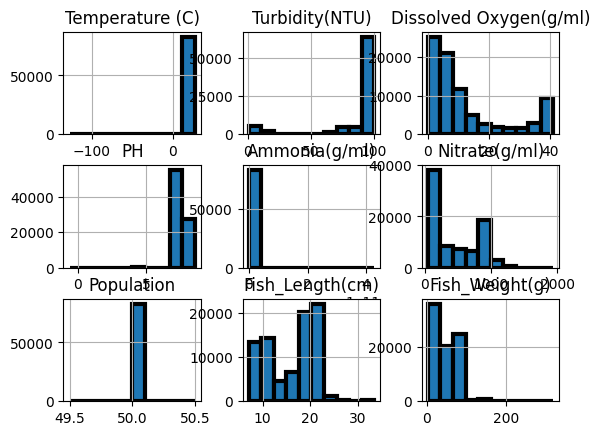

In [41]:
# Plot a histogram for each numerical column
df.hist(edgecolor='black', linewidth=3.0)
plt.show()

In [44]:
import seaborn as sns

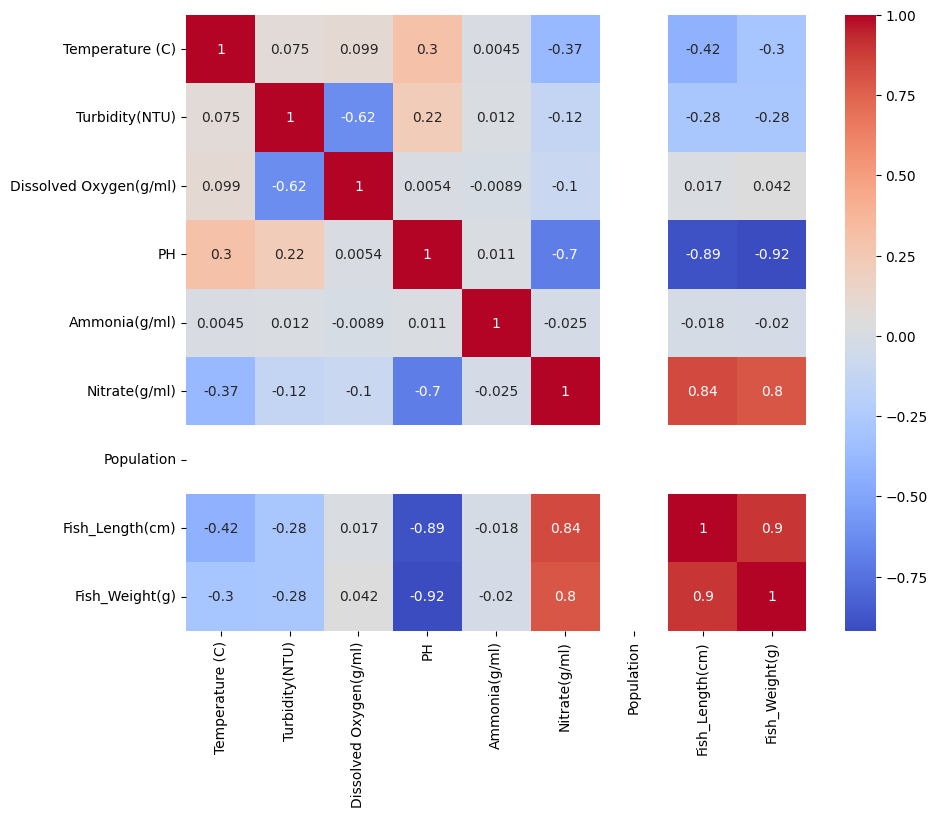

In [45]:
# Calculate the correlation matrix
corr = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

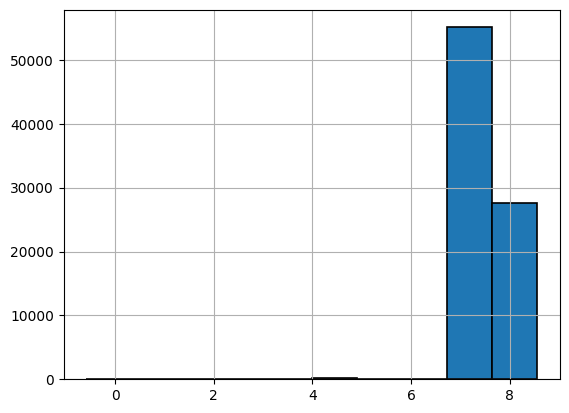

In [47]:
# Plot a histogram for the target variable
df['PH'].hist(edgecolor='black', linewidth=1.2)
plt.show()

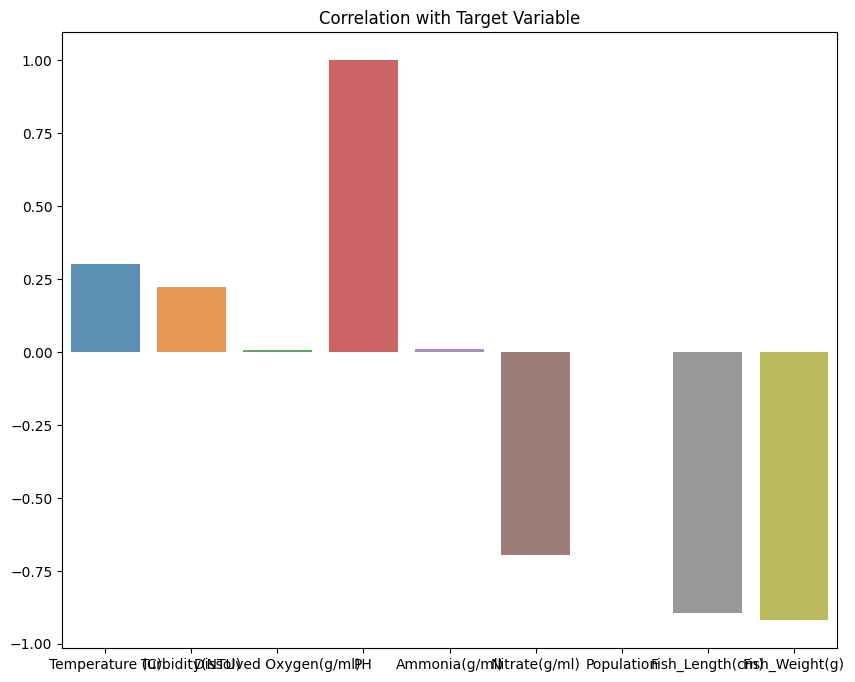

In [48]:
# Calculate the correlation between the numerical columns and the target variable
corr_target = df.corr()['PH']

# Display the correlation as a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_target.index, y=corr_target.values, alpha=0.8)
plt.title('Correlation with Target Variable')
plt.show()

# Conclusion: We have performed Data Analysis(EDA)/ preprocessing of dataset. In our dataset we are focusing on maintain the Ph qaulity of water for certain sets conditions.

# My GitHub_proje Link: https://github.com/shivam2952002/L-and-T-project-